In [1]:
import pandas as pd
import sys; sys.path.append("..")
from trader.data.univ import Universe
from trader.data.binance import Binance
import numpy as np

In [2]:
univ = Universe()
b = Binance()

In [3]:
tickers = [x.upper() + "USDT" for x in univ.coins.index]
tickers

['BTCUSDT',
 'LTCUSDT',
 'BCHUSDT',
 'XLMUSDT',
 'XRPUSDT',
 'ETHUSDT',
 'SOLUSDT',
 'ALGOUSDT',
 'AVAXUSDT',
 'ADAUSDT',
 'MATICUSDT',
 'LINKUSDT',
 'UNIUSDT',
 'SUSHIUSDT',
 'AAVEUSDT',
 'COMPUSDT',
 'YFIUSDT',
 'FILUSDT',
 'MANAUSDT',
 'AXSUSDT',
 'DOGEUSDT',
 'SHIBUSDT']

In [4]:
start = pd.to_datetime("2018-01-01")
end = pd.to_datetime("2022-07-01")
bars = b.get_bars(tickers, start, end, interval="1d")

In [6]:
bars.to_csv("daily.csv", index=False)

In [7]:
df = univ.coins
df["Symbol"] = tickers

In [16]:
bars

OpenTime          Open          High           Low         Close  \
0     2018-01-01  13715.650000  13818.550000  12750.000000  13380.000000   
1     2018-01-02  13382.160000  15473.490000  12890.020000  14675.110000   
2     2018-01-03  14690.000000  15307.560000  14150.000000  14919.510000   
3     2018-01-04  14919.510000  15280.000000  13918.040000  15059.540000   
4     2018-01-05  15059.560000  17176.240000  14600.000000  16960.390000   
...          ...           ...           ...           ...           ...   
22102 2022-06-27      0.000011      0.000012      0.000011      0.000011   
22103 2022-06-28      0.000011      0.000011      0.000010      0.000010   
22104 2022-06-29      0.000010      0.000011      0.000010      0.000010   
22105 2022-06-30      0.000010      0.000010      0.000010      0.000010   
22106 2022-07-01      0.000010      0.000011      0.000010      0.000010   

             Volume  CloseTime   QuoteVolume  NumTrades  TakerBaseVolume  \
0      8.609916e+03 2018-01-02  1.147997e+08     105595     3.961939e+03   
1      2.007809e+04 2018-01-03  2.797171e+08     177728     1.134633e+04   
2      1.590567e+04 2018-01-04  2.361169e+08     162787     8.994954e+03   
3      2.132965e+04 2018-01-05  3.127816e+08     170310     1.268081e+04   
4      2.325149e+04 2018-01-06  3.693220e+08     192969     1.334662e+04   
...             ...        ...           ...        ...              ...   
22102  6.589164e+12 2022-06-28  7.396372e+07     169856     3.395097e+12   
22103  7.213778e+12 2022-06-29  7.665022e+07     171537     3.543045e+12   
22104  9.314619e+12 2022-06-30  9.344241e+07     207982     4.695839e+12   
22105  9.667011e+12 2022-07-01  9.711660e+07     228682     4.947494e+12   
22106  6.793666e+12 2022-07-02  6.904620e+07     148093     3.422575e+12   

       TakerQuoteVolue    Return    Symbol  
0         5.280975e+07       NaN   BTCUSDT  
1         1.580801e+08  0.096794   BTCUSDT  
2         1.335873e+08  0.016654   BTCUSDT  
3         1.861168e+08  0.009386   BTCUSDT  
4         2.118299e+08  0.126222   BTCUSDT  
...                ...       ...       ...  
22102     3.811267e+07  0.009107  SHIBUSDT  
22103     3.767575e+07 -0.099278  SHIBUSDT  
22104     4.714531e+07  0.023046  SHIBUSDT  
22105     4.972267e+07  0.013712  SHIBUSDT  
22106     3.479231e+07 -0.030918  SHIBUSDT  

[22107 rows x 13 columns]

In [9]:
df = pd.merge(bars, df, on="Symbol")

In [10]:
rets = df.groupby(["CloseTime", "Sector"]).apply(lambda x: x.Return.mean()).unstack()

In [25]:
vols = rets = df.groupby(["CloseTime", "Sector"]).apply(lambda x: x.QuoteVolume.mean()).unstack().rolling("180D").mean()

<AxesSubplot:xlabel='CloseTime'>

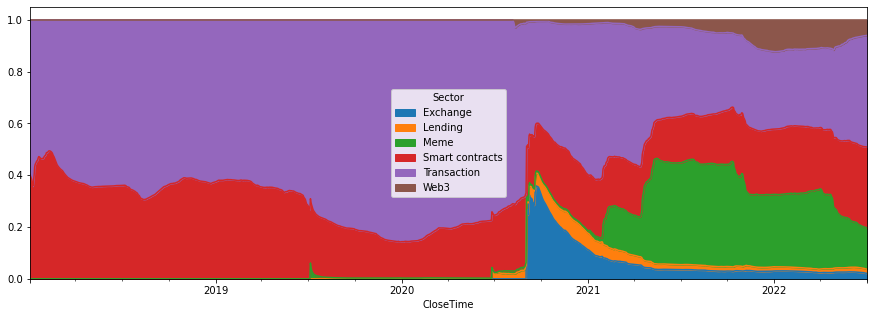

In [26]:
vols.div(vols.sum(axis=1), axis=0).plot(kind="area", figsize=(15,5))

<AxesSubplot:xlabel='CloseTime'>

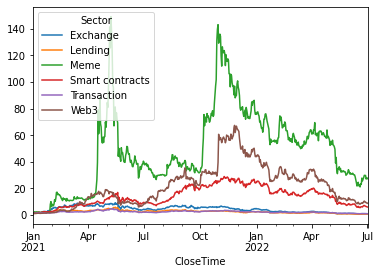

In [15]:
(1.0 + rets.last("2Y")).cumprod().plot(logy=False)

In [12]:
rets.corr()

Sector           Exchange   Lending      Meme  Smart contracts  Transaction  \
Sector                                                                        
Exchange         1.000000  0.730061  0.159882         0.699057     0.570197   
Lending          0.730061  1.000000  0.221677         0.756688     0.665848   
Meme             0.159882  0.221677  1.000000         0.263543     0.322866   
Smart contracts  0.699057  0.756688  0.263543         1.000000     0.837197   
Transaction      0.570197  0.665848  0.322866         0.837197     1.000000   
Web3             0.501488  0.552721  0.162425         0.648448     0.612932   

Sector               Web3  
Sector                     
Exchange         0.501488  
Lending          0.552721  
Meme             0.162425  
Smart contracts  0.648448  
Transaction      0.612932  
Web3             1.000000

In [13]:
prices = bars.pivot(index="CloseTime", values="Close", columns = "Symbol")

In [14]:
prices

Symbol      AAVEUSDT  ADAUSDT  ALGOUSDT  AVAXUSDT  AXSUSDT  BCHUSDT   BTCUSDT  \
CloseTime                                                                       
2018-01-02       NaN      NaN       NaN       NaN      NaN      NaN  13380.00   
2018-01-03       NaN      NaN       NaN       NaN      NaN      NaN  14675.11   
2018-01-04       NaN      NaN       NaN       NaN      NaN      NaN  14919.51   
2018-01-05       NaN      NaN       NaN       NaN      NaN      NaN  15059.54   
2018-01-06       NaN      NaN       NaN       NaN      NaN      NaN  16960.39   
...              ...      ...       ...       ...      ...      ...       ...   
2022-06-28      65.5   0.4856    0.3311     19.32    15.91    111.5  20742.56   
2022-06-29      60.1   0.4694    0.3126     18.12    15.31    103.3  20281.29   
2022-06-30      59.9   0.4662    0.3017     17.79    14.39    104.6  20123.01   
2022-07-01      57.0   0.4599    0.3147     16.99    14.58    103.2  19942.21   
2022-07-02      56.4   0.4487    0.3066     16.12    14.05    101.5  19279.80   

Symbol      COMPUSDT  DOGEUSDT  ETHUSDT  ...  LTCUSDT  MANAUSDT  MATICUSDT  \
CloseTime                                ...                                 
2018-01-02       NaN       NaN   754.99  ...   222.61       NaN        NaN   
2018-01-03       NaN       NaN   855.28  ...   247.33       NaN        NaN   
2018-01-04       NaN       NaN   934.03  ...   238.77       NaN        NaN   
2018-01-05       NaN       NaN   940.00  ...   233.00       NaN        NaN   
2018-01-06       NaN       NaN   959.30  ...   240.54       NaN        NaN   
...              ...       ...      ...  ...      ...       ...        ...   
2022-06-28     49.70   0.07216  1192.51  ...    55.86    0.9654     0.5320   
2022-06-29     46.66   0.06610  1144.05  ...    52.68    0.8878     0.5107   
2022-06-30     49.73   0.06956  1100.21  ...    53.68    0.8804     0.4974   
2022-07-01     47.48   0.06644  1071.01  ...    53.84    0.8817     0.4808   
2022-07-02     47.51   0.06644  1059.73  ...    51.19    0.8357     0.4621   

Symbol      SHIBUSDT  SOLUSDT  SUSHIUSDT  UNIUSDT  XLMUSDT  XRPUSDT  YFIUSDT  
CloseTime                                                                     
2018-01-02       NaN      NaN        NaN      NaN      NaN      NaN      NaN  
2018-01-03       NaN      NaN        NaN      NaN      NaN      NaN      NaN  
2018-01-04       NaN      NaN        NaN      NaN      NaN      NaN      NaN  
2018-01-05       NaN      NaN        NaN      NaN      NaN      NaN      NaN  
2018-01-06       NaN      NaN        NaN      NaN      NaN      NaN      NaN  
...              ...      ...        ...      ...      ...      ...      ...  
2022-06-28  0.000011    38.52      1.149     5.33   0.1191   0.3537  6218.14  
2022-06-29  0.000010    35.35      1.083     4.92   0.1143   0.3375  5650.84  
2022-06-30  0.000010    34.05      1.052     5.11   0.1101   0.3296  5604.23  
2022-07-01  0.000010    33.76      0.990     5.00   0.1123   0.3321  5419.10  
2022-07-02  0.000010    32.84      0.978     4.86   0.1101   0.3139  5460.96  

[1643 rows x 22 columns]